#### import packages

In [1]:
import numpy as np   # mathematical operations
import pandas as pd  # Data manipulation
import seaborn as sns  # visualization

#### Load dataset

In [2]:
loan=pd.read_csv("D://Files//loans_EDA.csv")

In [4]:
# first 5 rows
loan.head()

client_id loan_type  loan_amount  repaid  loan_id  loan_start    loan_end  \
0      46109      home        13672       0    10243  2002-04-16  2003-12-20   
1      46109    credit         9794       0    10984  2003-10-21  2005-07-17   
2      46109      home        12734       1    10990  2006-02-01  2007-07-05   
3      46109      cash        12518       1    10596  2010-12-08  2013-05-05   
4      46109    credit        14049       1    11415  2010-07-07  2012-05-21   

   rate  
0  2.15  
1  1.25  
2  0.68  
3  1.24  
4  3.13

In [5]:
# shape
loan.shape

(443, 8)

In [9]:
#checking data type
#loan.info()
loan.dtypes

client_id        int64
loan_type       object
loan_amount      int64
repaid           int64
loan_id          int64
loan_start      object
loan_end        object
rate           float64
dtype: object

- loan_Start and loan_end is in the object data type.change it into date datatype

#### Converting the data types of columns

In [10]:
#loan_start
loan['loan_start']=pd.to_datetime(loan['loan_start'])

In [12]:
loan['loan_end']=pd.to_datetime(loan['loan_end'])

In [13]:
loan.dtypes

client_id               int64
loan_type              object
loan_amount             int64
repaid                  int64
loan_id                 int64
loan_start     datetime64[ns]
loan_end       datetime64[ns]
rate                  float64
dtype: object

#### missing values

In [14]:
#percentage
loan.isnull().sum()/loan.shape[0]*100

client_id      0.0
loan_type      0.0
loan_amount    0.0
repaid         0.0
loan_id        0.0
loan_start     0.0
loan_end       0.0
rate           0.0
dtype: float64

- There is no missing values

#### missing value treatment

- Any variable has missing values is more than 30%--> remove the entire column--> 
                                               drop(colname, axis=1)

- Any variable has missing value is lies between 5% to 30%  --> Do imputation
                                                        --> mean/median (numerical), mode(categorical)
                                                        (fillna())
- Finally , if there is missing values (<5%) --> remove missing observations(row) --> dropna()

#### Outlier treatment

<Axes: >

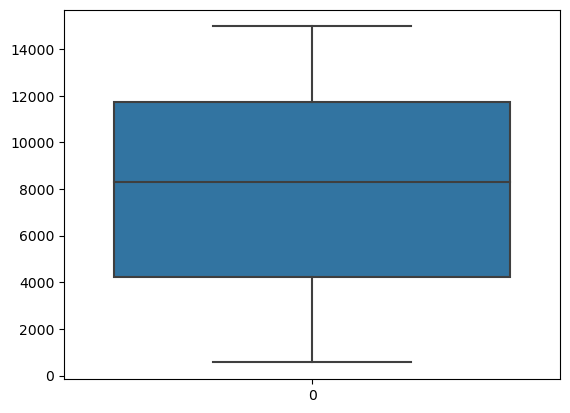

In [15]:
sns.boxplot(loan['loan_amount'])

There are no outliers

<Axes: >

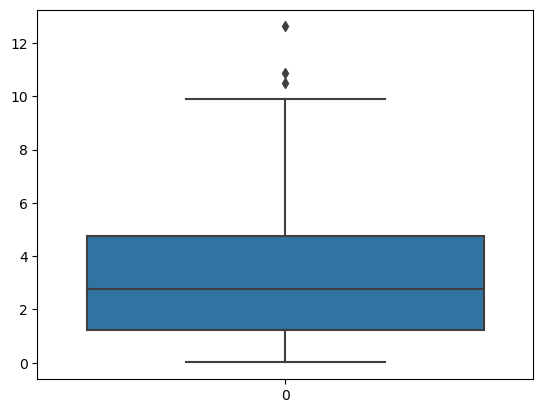

In [17]:
sns.boxplot(loan['rate'])

##### Z-score approach to treate outliers

In [26]:
#!pip install scipy


[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import scipy.stats as stats

In [19]:
# create a varaiable with z-score or each record
loan['ZR']=stats.zscore(loan['rate'])

In [20]:
loan.columns

Index(['client_id', 'loan_type', 'loan_amount', 'repaid', 'loan_id',
       'loan_start', 'loan_end', 'rate', 'ZR'],
      dtype='object')

In [21]:
# count outliers
loan[(loan['ZR']<-3) | (loan['ZR']>3)].shape[0]

3

In [23]:
# cleaned data: (removed outliers: In the case of very less outliers)
loan_1=loan[(loan['ZR']>-3)  & (loan['ZR']<3)]

In [25]:
loan_1.shape

(440, 9)

#### IQR method to treate outliers

In [27]:
# All the values below Q1-1.5*IQR and values above Q3+1.5*IQR are outliers.

Q1=loan['rate'].quantile(0.25)
Q3=loan['rate'].quantile(0.75)

# IQR (Inter Quartile Range)
IQR=Q3-Q1

# Lower limit
Lt=Q1-(1.5*IQR)

# Upper limit
Ut=Q3+(1.5*IQR)


In [29]:
#count outliers
loan[(loan['rate']<Lt)  | (loan['rate']>Ut)].shape[0]  

3

In [34]:
#loan['rate']=(np.where(loan[(loan['rate']<Lt)  | (loan['rate']>Ut)]),loan['rate'].median(), loan['rate'] )

#### Scaling Technique

- Standardization (z score)
- Normalization ( Min Max scalar)

In [35]:
### Standardization
from sklearn.preprocessing import StandardScaler

In [38]:
loan_2=loan[['loan_amount','rate']]


In [39]:
SS=StandardScaler()

In [40]:
scaled_data=SS.fit_transform(loan_2)
scaled_data

array([[ 1.36502962e+00, -4.45676908e-01],
       [ 4.34647423e-01, -8.21544457e-01],
       [ 1.13999132e+00, -1.05959390e+00],
       [ 1.08817014e+00, -8.25720763e-01],
       [ 1.45547678e+00, -3.63989115e-02],
       [-2.51263533e-01, -5.33379336e-01],
       [-4.33117505e-01,  2.61555546e+00],
       [ 1.12127812e+00,  3.85408004e-01],
       [ 7.38856969e-01,  9.45033020e-01],
       [-9.43412224e-01,  4.35523677e-01],
       [-1.52688038e+00,  1.36683993e+00],
       [ 1.01648330e-01, -1.13476741e+00],
       [ 2.57831622e-01, -9.84420394e-01],
       [-1.06960640e+00,  1.15384832e+00],
       [ 6.88715175e-01, -1.65864400e-01],
       [-1.54338725e-01, -8.04839232e-01],
       [ 9.52619355e-01,  3.45982920e-02],
       [ 5.00143642e-01, -4.05752176e-02],
       [ 9.66054477e-01, -1.01365454e+00],
       [-1.78094813e+00,  3.89584310e-01],
       [ 1.20620728e+00, -5.33379336e-01],
       [-9.91154890e-01, -1.00530192e+00],
       [ 1.04767198e-01, -9.96949312e-01],
       [ 9.

In [41]:
### Normalization-min-max scalar
from sklearn.preprocessing import MinMaxScaler

In [42]:
MS=MinMaxScaler()

In [43]:
scaled_data1=MS.fit_transform(loan_2)

In [44]:
scaled_data1

array([[9.09866778e-01, 1.69706582e-01],
       [6.40785457e-01, 9.83346550e-02],
       [8.44782126e-01, 5.31324346e-02],
       [8.29794616e-01, 9.75416336e-02],
       [9.36025534e-01, 2.47422680e-01],
       [4.42409104e-01, 1.53053132e-01],
       [3.89814044e-01, 7.50991277e-01],
       [8.39369969e-01, 3.27517843e-01],
       [7.28767694e-01, 4.33782712e-01],
       [2.42228698e-01, 3.37034100e-01],
       [7.34804330e-02, 5.13877875e-01],
       [5.44476825e-01, 3.88580492e-02],
       [5.89647516e-01, 6.74068200e-02],
       [2.05731335e-01, 4.73433783e-01],
       [7.14265890e-01, 2.22839017e-01],
       [4.70441299e-01, 1.01506741e-01],
       [7.90591174e-01, 2.60904044e-01],
       [6.59728004e-01, 2.46629659e-01],
       [7.94476825e-01, 6.18556701e-02],
       [0.00000000e+00, 3.28310864e-01],
       [8.63932834e-01, 1.53053132e-01],
       [2.28420760e-01, 6.34417129e-02],
       [5.45378851e-01, 6.50277557e-02],
       [7.79905634e-01, 5.16256939e-01],
       [6.843602

#### Encoding technique

In [ ]:
- one hot encoding
- label encoding

In [46]:
#one hot encoding
pd.get_dummies(loan,drop_first=True)

client_id  loan_amount  repaid  loan_id loan_start   loan_end  rate  \
0        46109        13672       0    10243 2002-04-16 2003-12-20  2.15   
1        46109         9794       0    10984 2003-10-21 2005-07-17  1.25   
2        46109        12734       1    10990 2006-02-01 2007-07-05  0.68   
3        46109        12518       1    10596 2010-12-08 2013-05-05  1.24   
4        46109        14049       1    11415 2010-07-07 2012-05-21  3.13   
..         ...          ...     ...      ...        ...        ...   ...   
438      26945        12963       0    10330 2001-11-26 2004-06-11  2.46   
439      26945         1728       1    10248 2004-01-27 2005-06-21  5.27   
440      26945         9329       0    10154 2001-12-17 2004-07-22  5.65   
441      26945         4197       0    10333 2003-10-16 2005-07-10  4.50   
442      26945         3643       0    11434 2010-03-24 2011-12-22  0.13   

           ZR  loan_type_credit  loan_type_home  loan_type_other  
0   -0.445677             False            True            False  
1   -0.821544              True           False            False  
2   -1.059594             False            True            False  
3   -0.825721             False           False            False  
4   -0.036399              True           False            False  
..        ...               ...             ...              ...  
438 -0.316211             False           False             True  
439  0.857331              True           False            False  
440  1.016030             False           False             True  
441  0.535755             False            True            False  
442 -1.289291             False            True            False  

[443 rows x 11 columns]

In [48]:
from sklearn.preprocessing import LabelEncoder
lE=LabelEncoder()
lE.fit_transform(loan['loan_type'])

array([2, 1, 2, 0, 1, 2, 0, 2, 2, 3, 3, 2, 0, 1, 3, 1, 1, 3, 1, 1, 3, 0,
       3, 2, 0, 2, 3, 1, 3, 0, 2, 2, 3, 3, 1, 1, 3, 2, 0, 2, 2, 1, 3, 0,
       2, 0, 3, 1, 2, 3, 0, 3, 2, 1, 2, 2, 2, 0, 2, 1, 2, 1, 0, 0, 3, 3,
       1, 0, 2, 3, 3, 3, 0, 2, 3, 0, 2, 1, 1, 1, 3, 1, 3, 2, 3, 1, 3, 1,
       0, 0, 2, 1, 0, 1, 2, 1, 3, 0, 2, 1, 2, 0, 0, 0, 3, 2, 2, 3, 0, 2,
       1, 0, 1, 2, 1, 1, 3, 1, 0, 1, 1, 3, 3, 2, 1, 2, 1, 3, 2, 0, 3, 1,
       2, 3, 3, 2, 3, 1, 0, 3, 2, 2, 2, 0, 1, 0, 2, 0, 3, 3, 2, 1, 3, 3,
       0, 1, 1, 2, 1, 0, 3, 0, 2, 2, 2, 1, 2, 2, 2, 3, 2, 1, 2, 1, 2, 3,
       0, 0, 1, 3, 0, 0, 3, 0, 2, 1, 3, 0, 3, 3, 0, 0, 1, 3, 2, 3, 3, 3,
       3, 0, 1, 1, 2, 3, 1, 2, 2, 0, 2, 3, 2, 3, 2, 0, 2, 0, 1, 0, 3, 0,
       2, 3, 2, 2, 0, 2, 1, 1, 2, 2, 0, 2, 0, 1, 1, 1, 3, 2, 3, 0, 3, 0,
       0, 1, 2, 3, 2, 2, 2, 1, 1, 1, 2, 3, 0, 0, 3, 2, 1, 1, 0, 0, 2, 1,
       0, 2, 1, 1, 1, 0, 0, 3, 3, 1, 2, 2, 0, 2, 2, 2, 1, 3, 2, 0, 0, 0,
       2, 3, 3, 0, 3, 1, 0, 2, 2, 2, 1, 0, 2, 3, 1,

In [49]:
# Split the data into independent and dependent
X=loan.drop('loan_amount',axis=1)
y=loan['loan_amount']